## AMS 518. Homework 1
### Juan Perez Osorio - SBU ID: 116248538

### Problem 1
$$
\min_{\vec{x}} \epsilon(\vec{x}, \vec{\theta})
$$
subject to:
$$
\sum_{i=0}^I a_i |x_i - x_i^0| \leq b
$$
$$
\sum_{i=0}^I \sigma(x_i) \leq k
$$
$$
l_i \leq x_i \leq u_i, \quad i = 0, \ldots, I
$$

---

### Problem 2
$$
\min_{\vec{x},\vec{s},\vec{y}} \frac{1}{J} \sum_{j=1}^J y_j
$$
subject to:
$$
s_j = \theta_{j0} - \left(x_0 + \sum_{i=1}^I \theta_{ij} x_i\right), \quad j = 1, \ldots, J
$$
$$
y_j \geq s_j,\quad y_j \geq -s_j, \quad j = 1, \ldots, J
$$
$$
\sum_{i=0}^I a_i z_i \leq b
$$
$$
z_i \geq x_i - x_i^0,\quad z_i \geq -(x_i - x_i^0), \quad i = 0, \ldots, I
$$
$$
\sum_{i=0}^I v_i \leq k
$$
$$
l_i v_i \leq x_i \leq u_i v_i, \quad v_i \in \{0, 1\}, \quad i = 0, \ldots, I
$$

**Statement.** We suppose that Problem 1 has a feasible solution. Problem 1 and Problem 2 are equivalent in the following sense. Suppose that Problem 1 has an optimal solution point $\vec{x}^*$, then there exists a vector $(\vec{x}^*, \vec{s}^*, \vec{y}^*)$ which is an optimal solution point of Problem 2 and $\epsilon(\vec{x}^*, \vec{\theta}) = \frac{1}{J}\sum_{j=1}^J y_j^*$. Then suppose that Problem 2 has an optimal solution point $(\vec{x}^*, \vec{s}^*, \vec{y}^*)$, then $\vec{x}^*$ is an optimal solution point of Problem 1 and $\frac{1}{J}\sum_{j=1}^J y_j^* = \epsilon(\vec{x}^*, \vec{\theta})$.

**Assignment 1** Provide a simple numerical example with $x \in \mathbb{R}^2$ and 4 rows in the extended design matrix. For this example, find an optimal solution vector $\vec{x}^*$ and optimal objective function $\epsilon(\vec{x}^*,\vec{\theta})$. Find also corresponding optimal point $(\vec{x}^*,\vec{s}^*,\vec{y}^*)$ and calculate $\frac{1}{J}\sum_{j=1}^J y_j^*$.

**Solution.** In RStudio we proceed to execute the following code; it contains the specifications for generating the 4 $\times$ 3 matrix, as well as the matrix for the cardinality and budget constraints 

~~~R 
library(PSG)

# Create the problem list
problem_list_1 <- list()

# Create a matrix of scenarios, i.e.,  observations (theta_1, theta_2, y)
matrix_1 <- matrix(rnorm(12, mean = 0, sd = 1), ncol = 3)

# Give column names
colnames(matrix_1) <- c("x1", "x2", "scenario_benchmark")

# Create a matrix of coefficients for linear constraints
matrix_2 <- matrix(c(2, 1), ncol = 2)

# Give col names
colnames(matrix_2) <- c("x1", "x2")

# Create a matrix for cardinality constraint
matrix_3 <- matrix(c(1,1,0),ncol = 3)
colnames(matrix_3) <- c("x1", "x2", "scenario_benchmark")

# Fill the list
problem_list_1$matrix_scenario <- matrix_1

problem_list_1$matrix_linear_constraints <- matrix_2

problem_list_1$matrix_constraint_card_new <- matrix_3

problem_list_1$problem_statement <- sprintf (
  "
minimize
Meanabs_err(matrix_scenario)

Constraint: <= 2
linear(matrix_linear_constraints)

Constraint: <= 1, linearize = 1
cardn(0.001, matrix_constraint_card_new)

Box: >= 0

Solver: car
   "
)

#calculate and store the results
results_1 <- rpsg_solver(problem_list = problem_list_1)
~~~

The data that we have generated is the following:

|   | $x_1$   | $x_2$   | scenario_benchmark |
|:-:|:-----:|:----:|:----------------:|
| 1 | -0.21 | 0.41 | 0.24             |
| 2 | 0.93  | 0.73 | 1.83             |
| 3 | 0.60  | 1.38 | 0.58             |
| 4 | 0.77  | 0.99 | 1.12             |

<p style="text-align:center"> Table 1. Matrix of scenarios </p>

| $x_1$ | $x_2$ |
|:--:|:--:|
| 2  | 1  |

<p style="text-align:center"> Table 2. Matrix of linear constraints </p>

| $x_1$ | $x_2$ | scenario_benchmark |
|:--:|:--:|:----------------:|
| 1  | 1  | 0                |

<p style="text-align:center"> Table 3. Matrix of cardinality constraints </p>

After solving using PSG we obtain the following results:

~~~R
Solution is optimal
Calculating resulting outputs. Writing solution.
Objective: objective = 0.564311212678 [0.179892898839]
Solver has normally finished. Solution was saved.
Problem: problem_1, solution_status = optimal
Timing: data_loading_time = 0.14, preprocessing_time = 0.01, solving_time = 0.01
Variables: optimal_point = point_problem_1
Objective: objective = 0.564311212678 [0.179892898839]
Constraint: constraint_1 =  1.431752776115E+00 [-5.682472238853E-01]
Constraint: constraint_2 =  1.000000000000E+00 [ 0.000000000000E+00]
Function: meanabs_err(matrix_scenario) =  5.643112126778E-01
Function: pseudo_R2_meanabs_err(matrix_scenario) = -5.941646167179E-02
Function: adjusted_pseudo_R2_meanabs_err(matrix_scenario) =  6.468611794427E-01
Function: contributions(meanabs_err(matrix_scenario)) = point_contributions_meanabs_err
Function: linear(matrix_linear_constraints) =  1.431752776115E+00
Function: cardn(1.E-03,matrix_constraint_card_new) =  1.000000000000E+00
OK. Solver Finished
~~~

The optimal solution vector obtained for this particular example is

$$\mathbf{x^*}=\begin{pmatrix} x_1 \\ x_2 \end{pmatrix}=\begin{pmatrix} 0.716 \\ 0.000 \end{pmatrix}$$

The corresponding value of the objective function evaluated at this point is known as the optimal objective function and it's value is

$$\mathbf{\epsilon}(\bar{x}^*, \theta)=0.564$$

**Why both approaches are equivalent?**

By introducing auxiliary variables $s_j$, which represent the residuals (difference of the observed value and the predicted value), and $y_j$, which represents the absolute value of the residuals, it is clear to see that residuals $s_j$ encode the same error as in problem 1. 

We can see that the auxiliary conditions 

$$y_j \geq \lvert s_j\rvert \iff y \geq s_j \quad \text{and} \quad y \geq -s_j$$

force $y_j = \lvert s_j\rvert$, since we're minimizing $\frac{1}{J} \sum_{j=1}^J y_j$, hence the smallest feasible $y_j$ is $\lvert s_j\rvert$, at optimality we have the following

$$
\begin{split}
\min_{\vec{x},\vec{s},\vec{y}} \frac{1}{J} \sum_{j=1}^J y_j =& \min_{\vec{x},\vec{s}} \frac{1}{J} \sum_{j=1}^J \lvert s_j\rvert \\
=& \min_{\vec{x}} \frac{1}{J} \sum_{j=1}^J{\left|\theta_{j0} - \left(x_0 + \sum_{i=1}^I \theta_{ij} x_i\right)\right|} \\
=& \min_{\vec{x}} {\epsilon(\vec{x}, \vec{\theta})}
\end{split}
$$
where the last equality holds by definition of the mean absolute error. Finally, we can easily spot that the constraints are just a linearized version of the constraints in problem 1, which have been linearized by either introducing some indicator functions or by expressing the absolute value function by definition, therefore this shows that **Problem 1** and **Problem 2** are equivalent.

**Assignment 2.** Optimal hedging of CDO book

We first load the data to RStudio and check what are the contents of the file

~~~R
> library(PSG)

> load('C:/Users/JUANJO/Documents/GitHub/ams-518/problem_cdohedge_1_R_data/
problem_cdohedge_1.RData')
> is.list(problem.list)
[1] TRUE
> names(problem.list)
[1] "problem_name"               "problem_statement"         
[3] "point_lowerbounds"          "point_upperbounds"         
[5] "matrix_scenarios"           "matrix_constraint_budget"  
[7] "matrix_constraint_card_new"
~~~

* How many dependent and independent variables (factors) are in the extended design matrix? How many observations (numerical rows) are in
the matrix?

~~~R 

> nrow(problem.list$matrix_scenarios)
[1] 50
> ncol(problem.list$matrix_scenarios)
[1] 1005
~~~

**Answer:** there are 1005 total variables, of which 1004 are independent factors and 1 is a dependent factor (the benchmark). The number of observations, same as the number of rows is 50.

* What available budget is equal to ($b$)? What is the maximal number of positions ($k$)? What are the box constraints ($l_i$ and $u_i$)?

~~~R
> problem.list$problem_statement
[1] "minimize"                                       
[2] "linearize = 1"                                  
[3] "meanabs_err(matrix_scenarios)"                  
[4] "Constraint: <= 1000000, linearize = 1"          
[5] "polynom_abs(matrix_constraint_budget)"          
[6] "Constraint: <= 50, linearize = 1"               
[7] "cardn(0.001, matrix_constraint_card_new)"       
[8] "Box: >= point_lowerbounds, <= point_upperbounds"
[9] "Solver: car, precision = 5"
~~~

From the problem statement we can see that the available budget is $\$1,000,000$ and the maximal number of positions is $k = 50$. We can see that we have two different set of bounds for the box constraints:

~~~R 

> length(point_lowerbounds)
[1] 1004
> unique(point_lowerbounds)
[1] -5e+06 -1e+07
> sum(point_lowerbounds == -5e+06)
[1] 1000
> sum(point_lowerbounds == -1e+07)
[1] 4

> length(point_upperbounds)
[1] 1004
> unique(point_upperbounds)
[1] 5e+06 1e+07
> sum(point_upperbounds == 5e+06)
[1] 1000
> sum(point_upperbounds == 1e+07)
[1] 4
~~~

so we have the following box constraints

$$(-5\cdot10^6, 5\cdot10^6)$$
$$(-1\cdot10^7, 1\cdot10^7)$$

* After solving the problem PSG saved an optimal point. What are the names of variables containing optimal hedging position? What is the value of budget in optimal solution? What is optimal value of the mean absolute error?

We can see that the output list has the following data and that the solution is optimal:

~~~R

> output.list$status
[1] "optimal"
> names(output.list)
 [1] "status"                            "loading.time"                     
 [3] "preprocessing.time"                "solving.time"                     
 [5] "objective"                         "gap"                              
 [7] "function.value"                    "constraint.value"                 
 [9] "point_constraints_problem_1"       "point_slack_constraints_problem_1"
[11] "point_problem_1"                   "point_contributions_meanabs_err"  
~~~

The names of the variables containing optimal hedging position are the variables in ```point_problem_1``` which are not zero, we can see those by executing the following code

~~~R
> point_problem_1 <- output_test.list$point_problem_1
> hedging_points <- point_problem_1[point_problem_1 != 0]
> hedging_points
         h20          h24          h48         h103         h116         h140 
-292838.1102   27393.0863   22779.5979  -12758.2266   51406.2808   -4903.5184 
        h164         h175         h239         h276         h312         h328 
-100611.0314 -145891.6349  219338.0152   26134.5548    -681.2306  -29770.6794 
        h330         h333         h334         h339         h355         h368 
  77227.5454 -344720.6544  157981.1997  -78636.2501  -51770.8141  -22684.4783 
        h401         h433         h470         h494         h526         h533 
  73137.1172  431686.5794  -22126.8531    2759.3238  -50007.2213  110805.2602 
        h544         h569         h574         h613         h633         h650 
 151737.7301    2019.1270  -26758.0743   12486.5907    3440.3362   47011.1462 
        h655         h670         h676         h693         h703         h746 
 -42195.1782   16513.9667    8052.5790 -108032.8527    1963.9966   16459.0738 
        h747         h780         h809         h811         h817         h855 
 -29736.0867 -262619.2573    3950.8772    7251.5506   -1173.6228   86176.0139 
        h858         h883         h899         h925         h934         h937 
 -11824.4751   14073.0607   29244.7822   -6233.3094    2257.3883   -2889.3510 
        h982        hbar4 
-310586.6999   13775.6408 

> length(hedging_points)
[1] 50
~~~

Indeed, we can see that the number of hedging instruments used is 50, this makes sense since this meets the cardinality constraint condition (number of factors used should be less or equal than 50). Finally, we can see that the value of budget in the optimal solution and the optimal value of the mean absolute error are given by

~~~R
> output_test.list$output
 [1] "Problem: problem_1, solution_status = optimal"                                           
 [2] "Timing: data_loading_time = 0.19, preprocessing_time = 0.08, solving_time = 38.02"       
 [3] "Variables: optimal_point = point_problem_1"                                              
 [4] "Objective: objective = 3.196705365553E-06 [3.196705365553E-06]"                          
 [5] "Constraint: constraint_1 =  4.248688221019E+03 [-9.957513117790E+05]"                    
 [6] "Constraint: constraint_2 =  5.000000000000E+01 [ 0.000000000000E+00]"                    
 [7] "Function: meanabs_err(matrix_scenarios) =  3.196705365553E-06"                           
 [8] "Function: pseudo_R2_meanabs_err(matrix_scenarios) =  9.999999999992E-01"                 
 [9] "Function: contributions(meanabs_err(matrix_scenarios)) = point_contributions_meanabs_err"
[10] "Function: polynom_abs(matrix_constraint_budget) =  4.248688221019E+03"                   
[11] "Function: cardn(1.E-03,matrix_constraint_card_new) =  5.000000000000E+01"      
~~~          

$$\text{MAE}_\text{opt} = 3.196 \cdot 10^{-6}$$

$$\text{Budget} = \$4,248.68$$

* Suppose that we do not allow for short positions. Modify problem statement and solve the problem. Save and provide solution

New problem statement would be:

~~~R 
> problem.list$problem_statement[8] <- "Box: >= 0, <= point_upperbounds"
> problem.list$problem_statement
[1] "minimize"                                       
[2] "linearize = 1"                                  
[3] "meanabs_err(matrix_scenarios)"                  
[4] "Constraint: <= 1000000, linearize = 1"          
[5] "polynom_abs(matrix_constraint_budget)"          
[6] "Constraint: <= 50, linearize = 1"               
[7] "cardn(0.001, matrix_constraint_card_new)"       
[8] "Box: >= 0, <= point_upperbounds"
[9] "Solver: car, precision = 5"
~~~

We have to set all lower bounds to zero for the box constraints. Solving the problem again with the PSG solver we obtain:

~~~R

> output_ns.list <- rpsg_solver(problem.list)
Data successfully read from C:\Aorda\PSG25\PSG25_license.bin
Running solver
Reading problem formulation
Asking for data information
Getting data
      1.1% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_constraint_budget was read
100% of matrix_constraint_card_new was read
Start optimization
Ext.iteration=1  Objective=0.534811988473E-08  Residual=0.000000000000E+00
Optimization is stopped
Solution is optimal
Calculating resulting outputs. Writing solution.
Objective: objective = 5.348119884729E-09 [5.348119884729E-09]
Solver has terminated. Current solution was saved.
Problem: problem_1, solution_status = optimal
Timing: data_loading_time = 0.18, preprocessing_time = 0.09, solving_time = 0.35
Variables: optimal_point = point_problem_1
Objective: objective = 5.348119884729E-09 [5.348119884729E-09]
Constraint: constraint_1 =  3.232423844159E+03 [-9.967675761558E+05]
Constraint: constraint_2 =  5.000000000000E+01 [ 0.000000000000E+00]
Function: meanabs_err(matrix_scenarios) =  5.348119884729E-09
Function: pseudo_R2_meanabs_err(matrix_scenarios) =  1.000000000000E+00
Function: contributions(meanabs_err(matrix_scenarios)) = point_contributions_meanabs_err
Function: polynom_abs(matrix_constraint_budget) =  3.232423844159E+03
Function: cardn(1.E-03,matrix_constraint_card_new) =  5.000000000000E+01
OK. Solver Finished
~~~

As we can see, our new solution is optimal and we can now inspect our cardinality constraints, budget constraints and hedging factors

~~~R

> point_problem_1_ns <- output_ns.list$point_problem_1
> hedging_points_ns <- point_problem_1_ns[point_problem_1_ns != 0]
> hedging_points_ns
         h29          h35          h46          h53          h56          h75 
 42566.02490  27496.51477  30718.96415 130651.60726   7481.21755  31173.93021 
        h110         h116         h119         h125         h144         h174 
579354.94475  19898.42563  22471.61431    787.12754  30309.36616 912150.91015 
        h260         h262         h294         h334         h351         h366 
 28378.33731 516857.18244   7040.92918  13662.14465  19156.84154  50512.93813 
        h396         h399         h502         h503         h505         h506 
  1517.69247  11905.12615  44566.64281  48123.71232     37.18653  51337.84448 
        h509         h536         h612         h633         h655         h669 
109963.30213  89961.11680    499.21244   4243.32171  18774.14066  37304.41791 
        h729         h735         h737         h742         h747         h769 
 13239.79848   2794.38151  12187.31683  39739.91353   8047.10754  49913.44199 
        h771         h779         h783         h796         h801         h811 
 43364.20118   1786.60035  95616.57453    652.59063   1708.28862   2098.29095 
        h841         h851         h858         h880         h895         h901 
 28498.58091   4345.50698    670.60409  44004.92369 329638.04991    137.63144 
        h981         h989 
 58579.69383  49258.27818 

> length(hedging_points_ns)
[1] 50

> all(hedging_points_ns > 0)
[1] TRUE
~~~

As we can see, all hedging instruments have a positive position size and the number of hedging instruments is still 50, which means that indeed we have meet the no-short condition and the cardinality constraint. The value of budget in the optimal solution and the optimal value of the mean absolute error are given by

~~~R

> output_ns.list$output[7]
[1] "Function: meanabs_err(matrix_scenarios) =  5.348119884729E-09"
> output_ns.list$output[10]
[1] "Function: polynom_abs(matrix_constraint_budget) =  3.232423844159E+03"
~~~

$$\text{MAE}_\text{opt} = 5.348 \cdot 10^{-9}$$

$$\text{Budget} = \$3,232.42$$

Double checking with the solution obtained by running the PSG executable file and modifying the lower bound constraints we can see that both results agree, hence, solution is valid.

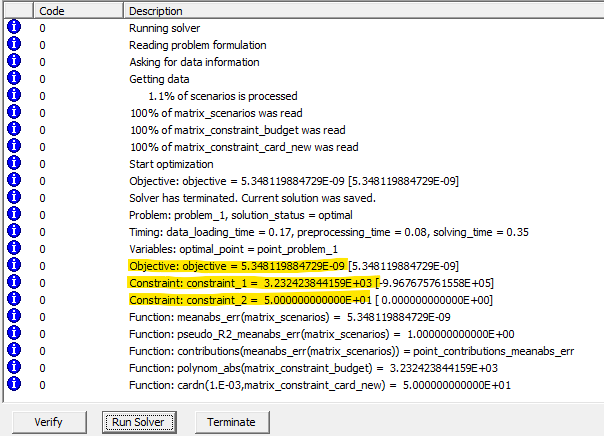

In [23]:
display(Image(filename="images/program_solution_ns.png"))